# Regression Models

# 1-Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
# for preprocessing 
from sklearn.preprocessing import OneHotEncoder ,StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
# for evaluation 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#models 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import category_encoders as ce
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm 
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import GridSearchCV

from sklearn import preprocessing


# 2-Read Dataset 

In [3]:
df=pd.read_csv('E:/Dataset/StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 3-Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [7]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [8]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [9]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [10]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

# 4-Data Splitting To Features&Labels

In [11]:
# y--> labels of data
y=df['math score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [12]:
# x---> Features of data
x=df.drop(columns= ['math score'],axis=1)
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


# 5-Data Preprocessing

In [13]:
# select numerical columns
numerical_df=x.select_dtypes(exclude='object').columns
numerical_df

Index(['reading score', 'writing score'], dtype='object')

In [14]:
# select categorical columns 
categorical_df=x.select_dtypes(include ='object').columns
categorical_df

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [15]:
categorical_df=[feature for feature in categorical_df if feature != 'parental level of education']
categorical_df 

['gender', 'race/ethnicity', 'lunch', 'test preparation course']

In [20]:
scaler =StandardScaler()
one_hot_encoder=OneHotEncoder()
ordinal_encoder=OrdinalEncoder()

In [21]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [22]:
ordinal_encoder=OrdinalEncoder(categories=[['some high school','high school','some college',
                                             "associate's degree","bachelor's degree",
                                            "master's degree"]])

In [23]:
# handle categorical data
preprocessing = ColumnTransformer([
    ('OneHotEncoder',one_hot_encoder,categorical_df),
    ('OrdinalEncoder',ordinal_encoder,['parental level of education']),
    ('StandardScaler',scaler,numerical_df)

])

In [24]:
x=preprocessing.fit_transform(x)
x

array([[ 1.        ,  0.        ,  0.        , ...,  4.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  2.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  5.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  2.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  2.        ,
         1.15336989,  1.18158627]])

# 6-Splitting Data into Train & Test

In [25]:
# split data
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.25,random_state=42)

In [26]:
print('x_train shape',x_train.shape)
print('x_test shape',x_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

x_train shape (750, 14)
x_test shape (250, 14)
y_train shape (750,)
y_test shape (250,)


# 7-Training Regression Models

In [27]:
# function to calculate errors to simlify the code 
def evaluate_model(actual,predicted):
    MAE=mean_absolute_error(actual,predicted)
    MSE=mean_squared_error(actual,predicted)
    RMSE=np.sqrt(mean_squared_error(actual,predicted))
    R2_Score=r2_score(actual,predicted)

    return MAE ,MSE,RMSE, R2_Score


In [28]:
models={
    'Linear Regression':LinearRegression(),
    'Knn Regression':KNeighborsRegressor(),
    'Decission Tree':DecisionTreeRegressor(),
    'Random Forest':RandomForestRegressor(),
    'XGB model':XGBRegressor()
}



In [29]:
models_list=[]
r2_list=[]

In [30]:
for i in range(len(list(models))):
    # models---> values
    model = list(models.values())[i]
    model.fit(x_train ,y_train)

    # model prediction 
    y_train_pred =model.predict(x_train)
    y_test_pred= model.predict(x_test)

    # model evaluation 
    train_MAE, train_MSE,train_RMSE, train_R2=evaluate_model(y_train ,y_train_pred)
    test_MAE, test_MSE,test_RMSE, test_R2=evaluate_model(y_test,y_test_pred)

    print (list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    
    print('model training performance:')
    print ('mean bsolute error =',train_MAE)
    print ('mean squared error =',train_MSE)
    print ('Root mean squared error =',train_RMSE)
    print('R2 score Error =',train_R2)
    
    print("----------------------------------------------")
    print('model testing performance:')
    print ('mean bsolute error =',test_MAE)
    print ('mean squared error =',test_MSE)
    print ('Root mean squared error =',test_RMSE)
    print('R2 score Error =',test_R2)
    print('\n')

    r2_list.append( test_R2)


Linear Regression
model training performance:
mean bsolute error = 4.248659520180561
mean squared error = 28.198427765300362
Root mean squared error = 5.310219182416143
R2 score Error = 0.8736566142040182
----------------------------------------------
model testing performance:
mean bsolute error = 4.334804989219556
mean squared error = 29.983498645952608
Root mean squared error = 5.4757190072128985
R2 score Error = 0.878127598546635


Knn Regression
model training performance:
mean bsolute error = 4.525066666666667
mean squared error = 32.21136
Root mean squared error = 5.6755052638509635
R2 score Error = 0.8556766243364382
----------------------------------------------
model testing performance:
mean bsolute error = 5.6168000000000005
mean squared error = 51.04559999999999
Root mean squared error = 7.1446203538046715
R2 score Error = 0.7925175467650889


Decission Tree
model training performance:
mean bsolute error = 0.02
mean squared error = 0.08333333333333333
Root mean squared err

In [31]:
scores_df=pd.DataFrame(list(zip(models_list,r2_list)),
                       columns=['Model Name ','R2_score']).sort_values(by=['R2_score'],ascending=False)
scores_df

,Model Name,R2_score
0,Linear Regression,0.878128
3,Random Forest,0.849201
4,XGB model,0.827396
1,Knn Regression,0.792518
2,Decission Tree,0.757698


In [32]:
# LLinearRegression 
model = LinearRegression()
model.fit(x_train,y_train )
y_pred = model.predict(x_test)


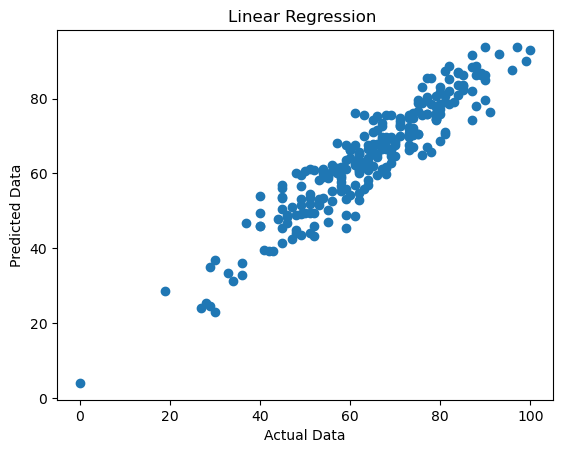

In [33]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Linear Regression ')
plt.show()

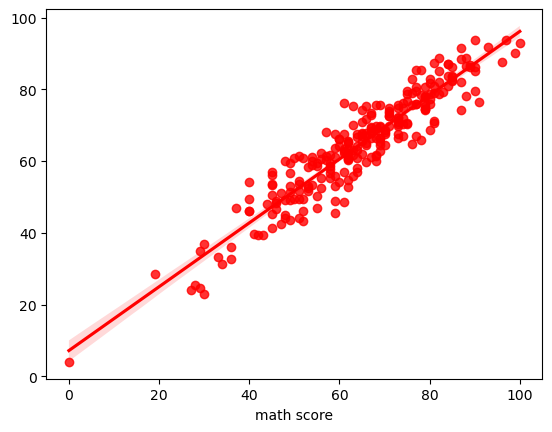

In [34]:
sns.regplot(x=y_test,y=y_pred, color ='red' )
plt.show()

In [35]:
prediction_df = pd.DataFrame({'Actual Vales': y_test, 
                              'predicted': y_pred,
                             'Deffirance': y_test - y_pred})